In [75]:
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
import yfinance
import stock_utils
import config
import warnings
warnings.filterwarnings('ignore')

In [85]:
tickers = stock_utils.fetch_liquid_stocks(min_price=10)

In [86]:
ignored = stock_utils.get_ignored_symbols()

In [87]:
filtered_tickers = list(set(tickers) - set(ignored))

In [88]:
print(filtered_tickers)

['MU', 'CVX', 'COF', 'IBM', 'SCHW', 'CSX', 'CSCO', 'CCL', 'FHN', 'SUNW', 'INTC', 'AAPL', 'STWD', 'TIGR', 'HST', 'DD', 'DIS', 'TAL', 'V', 'NVTA', 'TSLA', 'NOV', 'BSX', 'JCI', 'GPS', 'WMT', 'CNK', 'CLF', 'GE', 'ATUS', 'JNJ', 'LVS', 'FB', 'AMD', 'CAG', 'MUR', 'MIK', 'C', 'PEP', 'SABR', 'T', 'SFIX', 'PG', 'KHC', 'AMRS', 'PINS', 'MTG', 'VZ', 'BMY', 'NEE', 'POLA', 'SYF', 'SQ', 'FANG', 'UBER', 'JBLU', 'MO', 'SLB', 'EXC', 'COG', 'PHM', 'BA', 'RUN', 'ABBV', 'KMI', 'KR', 'SPWR', 'IFF', 'CL', 'PYPL', 'TWTR', 'EOG', 'AA', 'BLNK', 'SLM', 'HD', 'WKHS', 'FPRX', 'RF', 'NIO', 'KO', 'OSTK', 'FOXA', 'WMB', 'AAL', 'PFE', 'HAL', 'KEY', 'JPM', 'AES', 'FEYE', 'MARA', 'DDD', 'DBX', 'GEVO', 'HPE', 'OXY', 'MSFT', 'UAL', 'APA', 'GILD', 'FTI', 'DAL', 'DVN', 'PCG', 'NVDA', 'WDC', 'WYNN', 'USB', 'ZNGA', 'MAC', 'NCLH', 'XOM', 'UNP', 'SBUX', 'CLNE', 'ON', 'NKE', 'QCOM', 'DISH', 'MET', 'VUZI', 'BBBY', 'NEM', 'GIS', 'MGM', 'PBCT', 'MRNA', 'HBAN', 'GLW', 'CVS', 'EPD', 'LLY', 'AIG', 'WORK', 'BAC', 'KIM', 'WBA', 'MDLZ', '

In [89]:
# async with aiohttp.ClientSession() as session:
#     for t in filtered_tickers[:253]:
#         data[t] =  await stock_utils.fetch_historical_data_financialmodelingprep(t, config.FINANCIALMODELINGPREP_API, session, save_to_file=True)

In [176]:
PERIOD = '2y'

In [177]:
data = {}
for t in filtered_tickers:
    try:
        s = yfinance.Ticker(t)
        data[t] =  s.history(period=PERIOD)
        data[t].reset_index(inplace=True)
        data[t].columns = data[t].columns.str.lower()
        data[t] = data[t].iloc[::-1,:].reset_index(drop=True)
    except :
        print(t)

In [9]:
from bar import Bar

In [10]:
patterns_list2 = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 2:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close']
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close']
        )
        if bar1  <= bar2:
            patterns_list2.append(key)
    except ValueError as e:
        print(e)
    except Exception as e:
        print(e)
        

        

In [11]:
patterns_list = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 3:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close'],
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close'],
        )
        bar3 = Bar(
            data[key].loc[2, 'open'],
            data[key].loc[2, 'high'],
            data[key].loc[2, 'low'],
            data[key].loc[2, 'close'],
        )
        if bar1 <= bar2 <= bar3:
            patterns_list.append(key)
    except ValueError as e:
        print(e)
        

In [12]:
','.join(set(patterns_list+patterns_list2))

'CVX,COF,ET,CCL,FHN,RRC,INTC,MVIS,AAPL,TIGR,HST,DD,DIS,TAL,NVTA,ECOR,NOV,NLY,SIRI,BSX,GPS,CLNY,GE,LVS,CAG,MUR,PEP,SABR,AR,KOS,VBIV,PG,AMRS,BMY,NEE,SYF,SQ,UBER,JBLU,MO,SLB,MRO,EXC,OPK,OBLN,BA,KMI,SWN,KDMN,SPWR,IFF,CL,TWTR,EOG,INFI,AA,BLNK,SLM,KO,WMB,AAL,HAL,KEY,AES,FEYE,MARA,INO,ETRN,COCP,WWR,GNW,OXY,UAL,APA,DAL,DVN,NVDA,FUV,ZNGA,NCLH,XOM,UNP,CLNE,ON,QCOM,NKE,MET,IZEA,MRNA,GLW,CVS,EPD,LLY,AIG,BAC,MDLZ,AEO,LUV,F,SNAP,IVR,RIOT,BK,GM,IVZ,FCEL,AM,JNPR,SRNE,CRBP,COP,GRTS,MRK,AQMS,ABT,PLUG,RMG,VRAY,AGNC,FSLY,PAA,CTVA,X,HPQ,RUN'

In [13]:
','.join(patterns_list2)

'COF,ET,MVIS,AAPL,TIGR,DD,DIS,TAL,NOV,SIRI,BSX,LVS,PEP,AR,KOS,SYF,SQ,MO,SLB,EXC,RUN,KMI,SPWR,IFF,EOG,AA,INFI,SLM,AAL,HAL,KEY,FEYE,MARA,INO,WWR,GNW,UAL,DVN,NCLH,UNP,ON,QCOM,IZEA,GLW,CVS,EPD,LLY,AIG,AEO,SNAP,IVR,FCEL,AM,SRNE,MRK,ABT,RMG,VRAY,AGNC,FSLY,CTVA,HPQ,CVX,CCL,FHN,RRC,INTC,HST,NVTA,ECOR,NLY,GPS,CLNY,GE,MUR,CAG,SABR,VBIV,PG,AMRS,BMY,NEE,UBER,JBLU,MRO,OPK,OBLN,BA,SWN,KDMN,CL,TWTR,BLNK,KO,WMB,AES,ETRN,COCP,OXY,APA,DAL,NVDA,ZNGA,XOM,CLNE,NKE,MET,MRNA,BAC,MDLZ,LUV,F,RIOT,BK,GM,IVZ,JNPR,CRBP,COP,GRTS,AQMS,PLUG,PAA,X,FUV'

In [14]:
patterns_list3 = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 3:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close'],
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close'],
        )
        bar3 = Bar(
            data[key].loc[2, 'open'],
            data[key].loc[2, 'high'],
            data[key].loc[2, 'low'],
            data[key].loc[2, 'close'],
        )
        if (bar3.range / bar2.range >= 1.7) and (bar2.range / bar1.range) >= 0.95:
            patterns_list3.append(key)
    except ValueError as e:
        print(e)
        

In [15]:
','.join(patterns_list3)

'INFI,USB,HST,PG,NEE,JBLU,OBLN,SWN,ETRN,COCP,LUV,IVZ,GRTS'

In [414]:
patterns_list4 = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 3:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close'],
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close'],
        )
        if (bar2.range * 1.5 < bar1.range) and ((bar1._close > bar2._high) or (bar1._close < bar2._low)):
            patterns_list4.append(key)
    except ValueError as e:
        print(e)
','.join(patterns_list4)    

'IBM,CSX,SUNW,STWD,CNK,SFIX,MTG,POLA,FANG,KR,WKHS,FPRX,DDD,GEVO,HPE,VUZI,BBBY,GIS,HBAN,M,TDOC,BYND,ORCL,WFC,TJX,NUAN,GME,SKT'

# Data Wrangling

In [371]:
def dummy_featuring(series_df, prefix):
    series_df['per_changed'] =  round((series_df.close - series_df.shift(-1).close)*100 / series_df.shift(-1).close, 2)
    series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99 , -5, -4.5 , -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5,  np.inf], labels=list(range(21))) 
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99,-3 ,-0.5, 0.5, 3, np.inf], labels=list(range(5)))
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99, -0.5, 0.5, np.inf], labels=list(range(3)))
    dummy_df = pd.get_dummies(series_df['cluster'], prefix=prefix, prefix_sep='_')
    return pd.concat([series_df[['date']], dummy_df], axis=1)
    #return dummy_df
    

def df_featuring_v2(series_df):
    series_df['per_changed'] =  round((series_df.close - series_df.shift(-1).close)*100 / series_df.shift(-1).close, 2)
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99,-6, -4, -2, -0.5, 0.5, 2, 4, 6, np.inf], labels=list(range(9)))
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99, -2, -0.5, 0.5, 2, np.inf], labels=list(range(5)))
    series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99, -0.7, 0.7, np.inf], labels=list(range(3)))
    series_df['gap'] =  (series_df.open > series_df.shift(-1).high) | (series_df.open < series_df.shift(-1).low)
    return series_df[['date', 'open', 'high', 'low', 'close', 'cluster', 'gap']]

def model_df_v2(series_df, days=3):
    # model columns
    c =  []
    model_columns = []
    for n in range(days,0,-1):
        model_columns.extend([#'o_'+str(n),
                  'h_'+str(n),
                  'l_'+str(n),
                  'c_'+str(n)])
    model_columns.append('o_0')
    c.extend(model_columns)
    spy_dummy_columns= ['spy_'+str(n) for n in range(21)]
    vix_dummy_columns= ['vix_'+str(n) for n in range(21)]
    qqq_dummy_columns= ['qqq_'+str(n) for n in range(21)]
    dxy_dummy_columns= ['dxy_'+str(n) for n in range(21)]
    dummy_columns = spy_dummy_columns + vix_dummy_columns + qqq_dummy_columns + dxy_dummy_columns
    c.extend(dummy_columns)
    c.append('cluster')
    df = pd.DataFrame(columns=c)
    for n in range(days,0,-1):
        #df['o_' + str(n)] = series_df.shift(-n)['open']
        df['h_' + str(n)] = series_df.shift(-n).high
        df['l_' + str(n)] = series_df.shift(-n).low
        df['c_' + str(n)] = series_df.shift(-n)['close']
    df['o_0'] = series_df.open
    df['cluster'] = series_df['cluster']   
    df[dummy_columns] = series_df[dummy_columns]
    df.dropna(inplace=True)
    # opened without gap
    df = df[series_df['gap'] == False]
    #df = df[(df['o_0'] > 10) & (df['o_0'] < 50)] #test
    #normalization
    scaler = MinMaxScaler()
    df[model_columns] = scaler.fit_transform(df[model_columns].T).T
    return df 

In [353]:
def get_ticker_data(ticker, period='2y'):
    res = yfinance.Ticker(ticker)
    res =  res.history(period=period)
    res.reset_index(inplace=True)
    res.columns = res.columns.str.lower()
    res = res.iloc[::-1,:].reset_index(drop=True)
    return res

In [338]:
vix = get_ticker_data('^VIX', period=PERIOD)
vix_dummy = dummy_featuring(vix, 'vix')
vix_dummy

,date,vix_0,vix_1,vix_2,vix_3,vix_4,vix_5,vix_6,vix_7,vix_8,...,vix_11,vix_12,vix_13,vix_14,vix_15,vix_16,vix_17,vix_18,vix_19,vix_20
0,2021-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2021-01-21,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-19,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2019-01-29,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
501,2019-01-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
502,2019-01-25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,2019-01-24,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [339]:
qqq = get_ticker_data('QQQ', period=PERIOD)
qqq_dummy = dummy_featuring(qqq, 'qqq')
qqq_dummy

,date,qqq_0,qqq_1,qqq_2,qqq_3,qqq_4,qqq_5,qqq_6,qqq_7,qqq_8,...,qqq_11,qqq_12,qqq_13,qqq_14,qqq_15,qqq_16,qqq_17,qqq_18,qqq_19,qqq_20
0,2021-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-21,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2021-01-20,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2021-01-19,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2021-01-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2019-01-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,2019-01-28,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
502,2019-01-25,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
503,2019-01-24,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [340]:
spy = get_ticker_data('SPY', period=PERIOD)
spy

,date,open,high,low,close,volume,dividends,stock splits
0,2021-01-22,382.250000,384.130005,381.839996,382.880005,52860500,0.0,0
1,2021-01-21,384.489990,384.950012,383.250000,384.239990,47955800,0.0,0
2,2021-01-20,381.109985,384.790009,380.690002,383.890015,61836100,0.0,0
3,2021-01-19,378.339996,379.230011,376.750000,378.649994,51233300,0.0,0
4,2021-01-15,376.720001,377.579987,373.700012,375.700012,107160000,0.0,0
...,...,...,...,...,...,...,...,...
500,2019-01-29,254.266945,254.873877,252.879611,253.775589,66136300,0.0,0
501,2019-01-28,253.756346,254.180226,252.214861,254.112808,85613700,0.0,0
502,2019-01-25,255.895134,256.945293,254.016474,256.058929,96883400,0.0,0
503,2019-01-24,253.582885,254.536695,252.494211,253.910446,59204100,0.0,0


In [368]:
dxy = get_ticker_data('DX-Y.NYB', period=PERIOD)
dxy_dummy = dummy_featuring(dxy, 'dxy')
dxy_dummy

,date,dxy_0,dxy_1,dxy_2,dxy_3,dxy_4,dxy_5,dxy_6,dxy_7,dxy_8,...,dxy_11,dxy_12,dxy_13,dxy_14,dxy_15,dxy_16,dxy_17,dxy_18,dxy_19,dxy_20
0,2021-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-15,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2019-01-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,2019-01-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,2019-01-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502,2019-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [369]:
spy_dummy = dummy_featuring(spy, 'spy')
spy_dummy = spy_dummy.merge(vix_dummy, on='date', how='left')
spy_dummy = spy_dummy.merge(qqq_dummy, on='date', how='left')
spy_dummy = spy_dummy.merge(dxy_dummy, on='date', how='left')
spy_dummy

,date,spy_0,spy_1,spy_2,spy_3,spy_4,spy_5,spy_6,spy_7,spy_8,...,dxy_11,dxy_12,dxy_13,dxy_14,dxy_15,dxy_16,dxy_17,dxy_18,dxy_19,dxy_20
0,2021-01-22,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-21,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-20,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-19,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-15,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2019-01-29,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,2019-01-28,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,2019-01-25,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,2019-01-24,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [372]:
featured_dfs = []
for key in data.keys():
    if data[key].empty:
        continue
    merged_data = df_featuring_v2(data[key]).merge(spy_dummy, on='date', how='left')
    m = model_df_v2(merged_data, days=3)
    featured_dfs.append(m)

In [373]:
m = pd.concat(featured_dfs, ignore_index=True)
m

,h_3,l_3,c_3,h_2,l_2,c_2,h_1,l_1,c_1,o_0,...,dxy_12,dxy_13,dxy_14,dxy_15,dxy_16,dxy_17,dxy_18,dxy_19,dxy_20,cluster
0,0.750398,0.000000,0.721781,1.000000,0.360891,0.403816,0.658187,0.246423,0.643880,0.496026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.304404,0.000000,0.154145,0.796632,0.185233,0.773316,1.000000,0.479275,0.514249,0.579016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.502732,0.000000,0.371585,1.000000,0.273224,0.751367,0.909835,0.267759,0.592896,0.745901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.410024,0.000000,0.373576,0.585421,0.166288,0.476083,1.000000,0.394078,0.792712,0.706150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.848867,0.000000,0.566750,0.806046,0.352645,0.765743,1.000000,0.536525,0.879094,0.904283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61583,1.000000,0.634329,0.798509,0.955221,0.589550,0.708953,0.865670,0.000000,0.156717,0.156717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
61584,0.401936,0.000000,0.373226,1.000000,0.285773,0.606448,0.912538,0.198311,0.431528,0.504411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
61585,0.468421,0.000000,0.356892,0.535339,0.223057,0.513032,1.000000,0.445087,0.694233,0.648928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
61586,0.445782,0.000000,0.397591,0.710848,0.289160,0.662654,1.000000,0.493975,0.879517,0.831325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [344]:
#m = model_df_v2(dfs, days=3)
#m

#  Train-test split

In [374]:
X_train, X_test, y_train, y_test = train_test_split(m.drop(['cluster'], axis=1), m.cluster, stratify=m.cluster, test_size=0.25)

In [375]:
len(y_train[y_train == 0]) / len(y_train)

0.33458898919702973

In [376]:
len(y_train[y_train == 1]) / len(y_train)

0.32077677469636945

In [377]:
len(y_train[y_train == 2]) / len(y_train)

0.3446342361066009

# Random Forest

In [166]:
gsc = GridSearchCV(estimator=RandomForestClassifier(),
                  param_grid={
                      'max_depth' : range(3, 10),
                      'n_estimators' : (9, 50, 100, 500, 1000, 2000)
                  }, 
                  cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [167]:
grid_results = gsc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_results.best_params_

In [ ]:
rfc_model = grid_results.best_estimator_

In [81]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=10)

### Evaluation

In [82]:
y_pred = rfc_model.predict(X_test)

In [83]:
accuracy_score(y_pred, y_test)

0.49573647345447164

In [40]:
def generalize(x):
    if x < 1:
        return 0
    elif x > 1:
        return 2
    else :
        return 1
    
gfunc = np.vectorize(generalize)

In [41]:
accuracy_score(gfunc(y_pred), gfunc(y_test))

0.5000263476840385

In [240]:
X[1]

array([8.92877518e-04, 3.57142492e-02, 0.00000000e+00, 3.03571544e-02,
       8.92877518e-04, 3.57142492e-02, 0.00000000e+00, 3.03571544e-02,
       9.74107063e-01, 1.00000000e+00, 9.64285580e-01, 9.82142790e-01,
       9.74107063e-01])

# Deep Learning

In [168]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.initializers import Constant

In [395]:
init_kernel = TruncatedNormal(mean=0, stddev=0.05, seed=1234)
init_bias = Constant(value=1e-3)
deep_model = Sequential()

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

deep_model.add(Dense(128, input_dim=len(m.columns)-1, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
#deep_model.add(Dropout(0.5))
deep_model.add(Dense(128, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
#deep_model.add(Dense(35, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
# deep_model.add(Dense(32, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
# deep_model.add(Dropout(0.4))
deep_model.add(Dense(3, activation='softmax', kernel_initializer=init_kernel, bias_initializer=init_bias))
deep_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
deep_model.fit(X_train, y_train, epochs=2000, batch_size=256, validation_split=0.2, callbacks=[es_callback])#, validation_data=(X_val, y_val))

Epoch 1/2000
145/145 [==============================] - 1s 3ms/step - loss: 1.0430 - accuracy: 0.4710 - val_loss: 0.9794 - val_accuracy: 0.5160
Epoch 2/2000
145/145 [==============================] - 0s 2ms/step - loss: 0.9826 - accuracy: 0.5064 - val_loss: 0.9610 - val_accuracy: 0.5238
Epoch 3/2000
145/145 [==============================] - 0s 2ms/step - loss: 0.9634 - accuracy: 0.5227 - val_loss: 0.9525 - val_accuracy: 0.5297
Epoch 4/2000
145/145 [==============================] - 0s 2ms/step - loss: 0.9493 - accuracy: 0.5376 - val_loss: 0.9539 - val_accuracy: 0.5282
Epoch 5/2000
145/145 [==============================] - 0s 2ms/step - loss: 0.9490 - accuracy: 0.5323 - val_loss: 0.9456 - val_accuracy: 0.5387
Epoch 6/2000
145/145 [==============================] - 0s 2ms/step - loss: 0.9497 - accuracy: 0.5305 - val_loss: 0.9451 - val_accuracy: 0.5345
Epoch 7/2000
145/145 [==============================] - 0s 2ms/step - loss: 0.9416 - accuracy: 0.5383 - val_loss: 0.9481 - val_accuracy:

## Potential SELL

In [396]:
clus = 0
deep_model.evaluate(X_test[y_test ==clus], y_test[y_test ==clus])

161/161 [==============================] - 0s 581us/step - loss: 0.9089 - accuracy: 0.5713


[0.908911406993866, 0.5713453888893127]

## Potential BUY

In [397]:
clus = 2
deep_model.evaluate(X_test[y_test ==clus], y_test[y_test ==clus])

166/166 [==============================] - 0s 635us/step - loss: 0.8252 - accuracy: 0.6425


[0.8252083659172058, 0.642547607421875]

In [315]:
y_test.value_counts()

2    5345
0    5200
1    5037
Name: cluster, dtype: int64

In [316]:
pred = []
for res in deep_model.predict(X_test):
    pred.append(np.argmax(res))
pred = np.array(pred)

accuracy_score(y_test,  pred)

0.5228468745988961

In [317]:
deep_model.save('01_23_21.model')

INFO:tensorflow:Assets written to: 01_23_21.model\assets


#  Prediction

In [322]:
loaded_model = tf.keras.models.load_model('12_23_20.model')

In [323]:
up, down = [], []
for key in data.keys():
    stock = data[key].iloc[:4]
    df = df_featuring_v2(stock).merge(spy_dummy, on='date', how='left')
    try:
        mt = model_df_v2(df)
    except:
        continue
    pred = loaded_model.predict(mt.drop(['cluster'], axis=1))
    signal = np.argmax(pred)
    if signal == 0:
        down.append((key, pred[0][signal]))
    elif signal == 2:
        up.append((key, pred[0][signal]))

In [324]:
up.sort(key= lambda s : s[1], reverse=True)
up

[('DIS', 0.5602764),
 ('MARA', 0.50385004),
 ('RIOT', 0.4739845),
 ('JNJ', 0.41651472),
 ('WMT', 0.4164169),
 ('PBCT', 0.40450177),
 ('POLA', 0.37074807),
 ('RF', 0.34795973)]

In [325]:
down.sort(key= lambda s : s[1], reverse=True)
down

[('INTC', 0.8266818),
 ('MGM', 0.7462077),
 ('FUV', 0.7262829),
 ('WDC', 0.72622013),
 ('FANG', 0.71726835),
 ('TAL', 0.6970729),
 ('HPQ', 0.6706808),
 ('CSCO', 0.6659724),
 ('LUV', 0.66370827),
 ('TIGR', 0.65436524),
 ('AAL', 0.64604807),
 ('NVDA', 0.64337885),
 ('FIS', 0.63136345),
 ('SUNW', 0.6282672),
 ('JNPR', 0.61720806),
 ('BBBY', 0.60545313),
 ('AAPL', 0.6053156),
 ('DVN', 0.60336214),
 ('SPWR', 0.60221076),
 ('COG', 0.5951812),
 ('JCI', 0.58229613),
 ('DDD', 0.5822772),
 ('DBX', 0.58187324),
 ('VUZI', 0.5808423),
 ('SNAP', 0.58016646),
 ('FEYE', 0.5798619),
 ('FSLY', 0.5753547),
 ('UAL', 0.57488525),
 ('COF', 0.5678569),
 ('ORCL', 0.56497693),
 ('CLNE', 0.56293476),
 ('LVS', 0.56232405),
 ('GPS', 0.5557153),
 ('D', 0.5523694),
 ('NFLX', 0.5519825),
 ('WY', 0.55074865),
 ('RUN', 0.55057204),
 ('MRNA', 0.54882926),
 ('PFE', 0.54881394),
 ('KIM', 0.54834497),
 ('CVS', 0.5342834),
 ('CHNG', 0.5338598),
 ('EXC', 0.5314146),
 ('KHC', 0.52155036),
 ('AGNC', 0.5179788),
 ('RMG', 0.514

In [89]:
list(zip(*up))[0]

('SRNE',
 'WFC',
 'GNPX',
 'KMI',
 'JBLU',
 'MDLZ',
 'AES',
 'PG',
 'WMB',
 'FCX',
 'V',
 'DVN',
 'M',
 'RF',
 'AFL',
 'KOS',
 'USB',
 'PFE',
 'AMAT',
 'JWN',
 'NOV',
 'HBAN',
 'MRO',
 'FANG',
 'CNP',
 'C',
 'DAL',
 'EBAY',
 'GM',
 'EVRG',
 'TRVN',
 'CVX',
 'SM',
 'NLY',
 'CCL',
 'GLW',
 'NEE',
 'SCHW',
 'COP',
 'PPL',
 'APA',
 'NRZ',
 'BAC',
 'TWTR',
 'HAL',
 'CSX',
 'OXY',
 'XOM',
 'COTY',
 'PSTG',
 'PAGP',
 'GE',
 'PBF',
 'X',
 'BSX',
 'SLB',
 'HPE',
 'MPC',
 'AEO',
 'HL',
 'BE',
 'AM',
 'KO',
 'F',
 'VZ',
 'PRTY',
 'SPWR',
 'AR',
 'CVS',
 'CNK',
 'RUN',
 'JCI',
 'MO',
 'RAD',
 'SIRI',
 'MFA',
 'TPR',
 'HBI',
 'OPK',
 'LUV',
 'BBBY',
 'BA',
 'JPM',
 'QEP',
 'WORK',
 'CPE',
 'MGM',
 'NYMT',
 'AQMS',
 'CLF',
 'PAA',
 'LYFT',
 'MRK',
 'AAPL',
 'IDEX',
 'JNJ')

In [ ]:
clf_xgb.fit(X_train, y_train, verbose=)

# XGBOOST

In [378]:
import  xgboost as xgb

In [379]:
clf_xgb = xgb.XGBClassifier(missing=None, seed=1234, objective='multi:softmax', num_class=3)

In [380]:
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric=['mlogloss', 'merror'], eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:1.05655	validation_0-merror:0.49756
[1]	validation_0-mlogloss:1.03091	validation_0-merror:0.49243
[2]	validation_0-mlogloss:1.01443	validation_0-merror:0.48789
[3]	validation_0-mlogloss:1.00264	validation_0-merror:0.48821
[4]	validation_0-mlogloss:0.99394	validation_0-merror:0.48178
[5]	validation_0-mlogloss:0.98779	validation_0-merror:0.48321
[6]	validation_0-mlogloss:0.98186	validation_0-merror:0.47938
[7]	validation_0-mlogloss:0.97876	validation_0-merror:0.47899
[8]	validation_0-mlogloss:0.97487	validation_0-merror:0.47639
[9]	validation_0-mlogloss:0.97131	validation_0-merror:0.47490
[10]	validation_0-mlogloss:0.96921	validation_0-merror:0.47555
[11]	validation_0-mlogloss:0.96777	validation_0-merror:0.47639
[12]	validation_0-mlogloss:0.96605	validation_0-merror:0.47581
[13]	validation_0-mlogloss:0.96450	validation_0-merror:0.47678
[14]	validation_0-mlogloss:0.96330	validation_0-merror:0.47574
[15]	validation_0-mlogloss:0.96238	validation_0-merror:0.47522
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=1234, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=1234, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

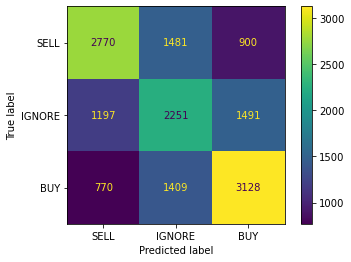

In [381]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['SELL', 'IGNORE', 'BUY'])

In [382]:
print(classification_report(y_test, clf_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56      5151
           1       0.44      0.46      0.45      4939
           2       0.57      0.59      0.58      5307

    accuracy                           0.53     15397
   macro avg       0.53      0.53      0.53     15397
weighted avg       0.53      0.53      0.53     15397



## GridSearchCV

In [389]:
param_grid = {
    'max_depth' : [7],
    'learning_rate' : [0.1],
    'gamma' : [0.25],
    'reg_lambda' : [1],
}
gsc_xgb = GridSearchCV(estimator=xgb.XGBClassifier(missing=None, 
                                                   seed=1234,
                                                   objective='multi:softmax', 
                                                   num_class=3,
                                                   subsample=0.9,
                                                   colsample_bytree=0.8
                                                  ),
                  param_grid=param_grid, 
                  cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [390]:
xgb_grid_results = gsc_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.7min finished


[00:43:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [391]:
gsc_xgb.best_params_

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 1}

In [392]:
best_cls = gsc_xgb.best_estimator_
best_cls.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric=['mlogloss', 'merror'], eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:1.08328	validation_0-merror:0.49627
[1]	validation_0-mlogloss:1.07079	validation_0-merror:0.49678
[2]	validation_0-mlogloss:1.05937	validation_0-merror:0.49250
[3]	validation_0-mlogloss:1.04995	validation_0-merror:0.49172
[4]	validation_0-mlogloss:1.04131	validation_0-merror:0.48782
[5]	validation_0-mlogloss:1.03400	validation_0-merror:0.48737
[6]	validation_0-mlogloss:1.02689	validation_0-merror:0.48516
[7]	validation_0-mlogloss:1.02075	validation_0-merror:0.48587
[8]	validation_0-mlogloss:1.01513	validation_0-merror:0.48269
[9]	validation_0-mlogloss:1.01084	validation_0-merror:0.48451
[10]	validation_0-mlogloss:1.00628	validation_0-merror:0.48425
[11]	validation_0-mlogloss:1.00181	validation_0-merror:0.48295
[12]	validation_0-mlogloss:0.99804	validation_0-merror:0.48334
[13]	validation_0-mlogloss:0.99490	validation_0-merror:0.48250
[14]	validation_0-mlogloss:0.99164	validation_0-merror:0.48120
[15]	validation_0-mlogloss:0.98869	validation_0-merror:0.47931
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=1234, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=1234, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

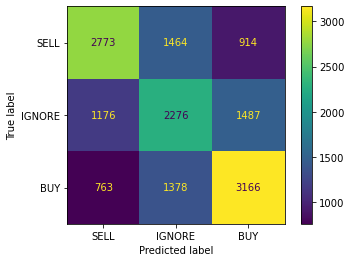

In [393]:
plot_confusion_matrix(best_cls,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['SELL', 'IGNORE', 'BUY'])

In [394]:
print(classification_report(y_test, best_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.54      0.56      5151
           1       0.44      0.46      0.45      4939
           2       0.57      0.60      0.58      5307

    accuracy                           0.53     15397
   macro avg       0.53      0.53      0.53     15397
weighted avg       0.54      0.53      0.53     15397



In [408]:
up, down = [], []
for key in data.keys():
    stock = data[key].iloc[:4]
    df = df_featuring_v2(stock).merge(spy_dummy, on='date', how='left')
    try:
        mt = model_df_v2(df)
    except:
        continue
    pred = best_cls.predict(mt.drop(['cluster'], axis=1))
    if pred == 0:
        down.append(key)
    elif pred == 2:
        up.append(key)

In [409]:
up

['DIS', 'WMT', 'POLA', 'MARA', 'ZNGA', 'WORK', 'RIOT']

In [410]:
down

['COF',
 'CSCO',
 'SUNW',
 'INTC',
 'AAPL',
 'TIGR',
 'TAL',
 'JCI',
 'GPS',
 'PEP',
 'T',
 'FANG',
 'COG',
 'RUN',
 'SPWR',
 'CL',
 'WKHS',
 'AAL',
 'PFE',
 'DDD',
 'DBX',
 'UAL',
 'DVN',
 'PCG',
 'NVDA',
 'WDC',
 'USB',
 'CVS',
 'WBA',
 'LUV',
 'NFLX',
 'BK',
 'BYND',
 'ORCL',
 'RMG',
 'HPQ',
 'FUV']

In [406]:
stock = data['INTC'].iloc[:4]
df = df_featuring_v2(stock).merge(spy_dummy, on='date', how='left')
try:
    mt = model_df_v2(df)
except:
    pass
pred = best_cls.predict(mt.drop(['cluster'], axis=1))

array([0], dtype=int64)